**CONNECTAR AMB GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**REVISAR TIPO DE GPU ASIGNADA**

In [ ]:
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Wed Jun 29 09:48:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**MÓDULOS DE TRABAJO**

In [ ]:
import numpy as np # Importar módulo NumPy
import tensorflow as tf #Importar módulo TensorFlow
from tensorflow import keras #Importamos framework Keras
from tensorflow.keras.models import Sequential  ##Building Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout ## Building Model
from tensorflow.keras.optimizers import Adam  # Optimizador para compilar el modelo
from tensorflow.keras.metrics import categorical_crossentropy  # Métricas para compilar el mdelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Generador de imágenes
from tensorflow.keras.models import load_model # Para cargar modelos si es necesario / ya se tienen de antes
from sklearn.metrics import confusion_matrix #Matriz de confusión
import itertools #Importamos el módulo itertools
import os #Importamos el módulo OS
import matplotlib.pyplot as plt #Importamos el módulo Matplotlib
%matplotlib inline #Para incluir los plots de matplotlib en el notebook junto al código

**COMPROBACIÓN DE TENSORFLOW CONECTADO A GPU**

In [ ]:
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**CARGAR MODELOS (en caso de tenerlos guardados)**

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model("RUTA/10C_model.h5")

mD1 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/D1/10C_model_D1.h5")
mD2 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/D2/10C_model_D2.h5")
mCNN1 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/CNN1/10C_model_CNN1.h5")
mCNN2 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/CNN2/10C_model_CNN2.h5")
mCNN3 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/CNN3/10C_model_CNN3.h5")
mCNN4 = load_model("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/CNN4/10C_model_CNN4.h5")

**FUNCIÓN PARA GRAFICAR LA MATRIZ DE CONFUSIÓN**

In [ ]:
# Función para graficar la matriz de confusión:
def plot_confusion_matrix(cm, classes, normalize=False, title="Matriz de Confusión", cmap=plt.cm.Blues):
  # cm: array de matrix de confusión, classes = array con todas las clases
  # Normalize = False --> Sin normalizar
  # cmap: tipo de mapeado de color
  plt.figure(figsize=(8, 6), dpi=80) # Crea una figura de ancho 8 pulgadas y 6 pulgadas de alto con una resolución de 80 puntos por pulgada
  plt.imshow(cm, interpolation="nearest", cmap=cmap)  # Mostrar en pantalla la matriz de confusión
  plt.title(title) # Título de la figura
  plt.colorbar() # Mostrar barra de color
  tick_marks = np.arange(len(classes)) # Número marcas en los ejes según el número de etiquetas
  plt.xticks(tick_marks, classes, rotation=90) # Definición de etiquetas del eje X y rotación de 90 grados
  plt.yticks(tick_marks, classes) # Definición de etiquetas del eje Y

  if normalize: # En caso de Normalize = True  --> Normalización de los datos
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Matriz de confusión normalizada")
  else:  # En caso de Normalize = False
    print("Matriz de confusión sin normalizar")

  print(cm)

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): # Producto cartesiano
    plt.text(j, i, cm[i,j],
             horizontalalignment="center",
             color="white" if cm [i,j] > thresh else "black")
  plt.tight_layout() # Ajustar el relleno entre y alrededor de los subplots
  plt.ylabel("Observaciones") # Nombre del eje Y
  plt.xlabel("Predicciones") # Nombre del eje X

**PARÁMETROS GENÉRICOS MODELOS**

In [ ]:
e = 10  # Número de Epochs
n = 7 # Exponente de la potencia de 2^n para el tamaño del lote --> Cambia
bs = 2**n  # Tamaño del lote
ncat = 10 # Número de categorias. INTRODUCIR AQUÍ EL NÚMERO DE CATEGORÍAS PARA EL MODELO.
img_h, img_w = (28,28) # Altura y Anchura en píxeles de las imagenes en el reescalado
nbands = 3  ## Numero de bandas de la imagen. En este caso 3 bandas ya que las imágenes son a color (RGB)

**ESTRUCTURAS DE REDES NEURONALES PROPUESTAS**

In [ ]:
mD1 = Sequential([
        Flatten(input_shape=(img_h,img_w,nbands)), # Input layer, número de neuronas definido por la resolución de la imágen que entra
        Dense(units=100, activation="relu"), # Hidden layer con 100 neuronas y una función de activación relu
        Dense(units=100, activation="relu"),  # Hidden layer con 100 neuronas y una función de activación relu
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])


# A cambiar, aádir Dropout y quizá cambiar número neuronas en las capas ocultas
mD2 = Sequential([
        Flatten(input_shape=(img_h,img_w,nbands)),  # Input layer, número de neuronas definido por la resolución de la imágen que entra
        Dense(units=250, activation="relu"),  # Hidden layer con 250 neuronas y una función de activación relu
        Dropout(0.5), # Aplicación de dropout del 50% a la Hidden layer
        Dense(units=250, activation="relu"), # Hidden layer con 250 neuronas y una función de activación relu
        Dropout(0.5), # Aplicación de dropout del 50% a la Hidden layer
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])

mCNN1 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)),# Convolutional layer con 32 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Flatten(), # Flatten layer, pasa de un tensor multidimensional a una dimensión
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])


mCNN2 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 32 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same"),  # Convolutional layer con 64 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Flatten(), # Flatten layer, pasa de un tensor multidimensional a una dimensión
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])

mCNN3 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 32 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same"), # Convolutional layer con 64 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 128 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2),  # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Flatten(), # Flatten layer, pasa de un tensor multidimensional a una dimensión
        Dense(250, activation="relu"), # Hidden layer con 250 neuronas y una función de activación relu
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])

mCNN4 = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 32 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same"), # Convolutional layer con 64 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Convolutional layer con 128 filtros, un núcleo de convolución (3,3), función de activación relu, no padding y número de neuronas igual a la resolución del input
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same", input_shape=(img_h,img_w,nbands)), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        MaxPool2D(pool_size=(2,2), strides=2), # Pool layer con un núcleo de agrupación de (2,2) y 2 pasos de desplazamiento de la ventanda de agrupación (strides)
        Flatten(), # Flatten layer, pasa de un tensor multidimensional a una dimensión        
        Dense(250, activation="relu"), # Hidden layer con 250 neuronas y una función de activación relu
        Dense(units=ncat, activation="softmax"), # Output layer con 2 neuronas definidas por el número de categorías y una función de activación softmax
])

In [ ]:
print("MODELO D1")
mD1.summary()  #Resumen de características del modelo D1

print("MODELO D2")
mD2.summary()  #Resumen de características del modelo D2

print("MODELO CNN1")
mCNN1.summary()  #Resumen de características del modelo CNN1

print("MODELO CNN2")
mCNN2.summary()  #Resumen de características del modelo CNN2

print("MODELO CNN3")
mCNN3.summary()  #Resumen de características del modelo CNN3

print("MODELO CNN4")
mCNN4.summary()  #Resumen de características del modelo CNN4

In [ ]:
mD1.compile(
    optimizer = "Adam",  ## Optimizador más común
    loss = "categorical_crossentropy",  ## Función de pérdida, específica para casos de categorización múltiple
    metrics = ["accuracy"]  ## Accuracy 
)

mD2.compile(
    optimizer = "Adam",  
    loss = "categorical_crossentropy",  
    metrics = ["accuracy"]  
)

mCNN1.compile(
    optimizer = "Adam",  
    loss = "categorical_crossentropy",  
    metrics = ["accuracy"]   
)

mCNN2.compile(
    optimizer = "Adam",  
    loss = "categorical_crossentropy",  
    metrics = ["accuracy"]  
)

mCNN3.compile(
    optimizer = "Adam",  
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]  
)

mCNN4.compile(
    optimizer = "Adam",  
    loss = "categorical_crossentropy",  
    metrics = ["accuracy"]   
)

**PREPROCESO DE IMAGENES**

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) # Función de pretratamiento de RN VGG16. Cambia a BGR y aplica un normalización zero-centered
valid_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) 

**FUNCIÓN DE COMPROBACIÓN DE IMÁGENES DESPUÉS DE PRETRATAMIENTO+GENERADOR**

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis("off") # Sin nombre de ejes
  plt.tight_layout()
  plt.show()

## **2-FOLD CROSSVALIDATION METHOD**

---



---


### **TRAIN = SPLIT_0 // VALIDATION/TEST = SPLIT_1**

**PARÁMETROS ESPECÍFICOS DEL MODELO 0-1**

In [ ]:
train_path_0 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/10C/Split_0"
valid_path_1 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/10C/Split_1"

train_size_0 = 23621 # Medida del train dataset
valid_size_1 = 23617 # Medida del validation dataset

**GENERADOR DE IMÁGENES**

In [ ]:
train_generator_0 = train_datagen.flow_from_directory(train_path_0, target_size=(img_h,img_w), classes=["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"], batch_size=bs) # Generador de imágenes para train, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El orden del output es aleatorio
valid_generator_1 = valid_datagen.flow_from_directory(directory=valid_path_1, target_size=(img_h,img_w), classes=["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"], batch_size=bs) # Generador de imágenes para validation, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El output tiene las imágenes en orden 
test_generator_1 = valid_datagen.flow_from_directory(directory=valid_path_1, target_size=(img_h,img_w), classes=["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"], batch_size=bs, shuffle=False) # Generador de imágenes para test, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El output tiene las imágenes en orden

Found 23621 images belonging to 10 classes.
Found 23617 images belonging to 10 classes.
Found 23617 images belonging to 10 classes.


In [ ]:
assert train_generator_0.n == train_size_0
assert valid_generator_1.n == valid_size_1
assert test_generator_1.n == valid_size_1
assert train_generator_0.num_classes == valid_generator_1.num_classes == ncat

**REVISAR IMAGENES PARA VER RESULTADO DE PRETRATAMIENTO + GENERADOR**

In [ ]:
imgs, labels = next(train_generator_0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

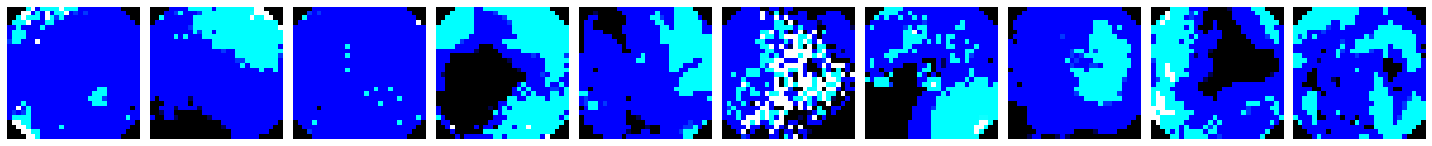

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

**ENTRENAMIENTO DE MODELOS 0-1**

In [ ]:
# Train = Split_0 y Validation = Split_1

print("MODELO 14C D1")
HistD1_0_1 = mD1.fit( # Entrenamiento del modelo D1
    train_generator_0, # Train dataset
    validation_data = valid_generator_1, # Validation dataset
    epochs = 10, # Número de espochs
    )

print("MODELO 14C D2")
HistD2_0_1 = mD2.fit( # Entrenamiento del modelo D2
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    )


print("MODELO 14C CNN1")
HistCNN1_0_1 = mCNN1.fit( # Entrenamiento del modelo CNN1
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    )

print("MODELO 14C CNN2")
HistCNN2_0_1 = mCNN2.fit( # Entrenamiento del modelo CNN2
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    )

print("MODELO 14C CNN3")
HistCNN3_0_1 = mCNN3.fit( # Entrenamiento del modelo CNN3
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    )

print("MODELO 14C CNN4")
HistCNN4_0_1 = mCNN4.fit( # Entrenamiento del modelo CNN4
    train_generator_0, 
    validation_data = valid_generator_1,
    epochs = 10,
    )


MODELO 10C D1
Epoch 1/10
185/185 [==============================] - 4096s 22s/step - loss: 1.4858 - accuracy: 0.7730 - val_loss: 1.3101 - val_accuracy: 0.7564
Epoch 2/10
185/185 [==============================] - 134s 727ms/step - loss: 0.9786 - accuracy: 0.8027 - val_loss: 0.9012 - val_accuracy: 0.8154
Epoch 3/10
185/185 [==============================] - 134s 726ms/step - loss: 0.7729 - accuracy: 0.8288 - val_loss: 0.7461 - val_accuracy: 0.8345
Epoch 4/10
185/185 [==============================] - 133s 722ms/step - loss: 0.6720 - accuracy: 0.8385 - val_loss: 0.7923 - val_accuracy: 0.7755
Epoch 5/10
185/185 [==============================] - 134s 725ms/step - loss: 0.6230 - accuracy: 0.8451 - val_loss: 0.7008 - val_accuracy: 0.8346
Epoch 6/10
185/185 [==============================] - 134s 728ms/step - loss: 0.5452 - accuracy: 0.8578 - val_loss: 0.5994 - val_accuracy: 0.8532
Epoch 7/10
185/185 [==============================] - 132s 716ms/step - loss: 0.5363 - accuracy: 0.8623 - val_l

In [ ]:
val_acc_D1_0_1 = list(HistD1_0_1.history["val_accuracy"])
max_val_acc_D1_0_1 = max(val_acc_D1_0_1)

val_acc_D2_0_1 = list(HistD2_0_1.history["val_accuracy"])
max_val_acc_D2_0_1 = max(val_acc_D1_0_1)

val_acc_CNN1_0_1 = list(HistCNN1_0_1.history["val_accuracy"])
max_val_acc_CNN1_0_1 = max(val_acc_CNN1_0_1)

val_acc_CNN2_0_1 = list(HistCNN2_0_1.history["val_accuracy"])
max_val_acc_CNN2_0_1 = max(val_acc_CNN2_0_1)

val_acc_CNN3_0_1 = list(HistCNN3_0_1.history["val_accuracy"])
max_val_acc_CNN3_0_1 = max(val_acc_CNN3_0_1)

val_acc_CNN4_0_1 = list(HistCNN4_0_1.history["val_accuracy"])
max_val_acc_CNN4_0_1 = max(val_acc_CNN4_0_1)

max_acc_0_1 = [max_val_acc_D1_0_1, max_val_acc_D2_0_1, max_val_acc_CNN1_0_1, max_val_acc_CNN2_0_1, max_val_acc_CNN3_0_1, max_val_acc_CNN4_0_1]

**PREDICCIÓN MODELO 0-1**

In [ ]:
print("MODELO 10C D1")
Pred_mD1_0_1 = mD1.predict(test_generator_1, verbose=1) # Predicciones del modelo D1

print("MODELO 10C D2")
Pred_mD2_0_1 = mD2.predict(test_generator_1, verbose=1) # Predicciones del modelo D1

print("MODELO 10C CNN1")
Pred_mCNN1_0_1 = mCNN1.predict(test_generator_1, verbose=1) # Predicciones del modelo CNN1

print("MODELO 10C CNN2")
Pred_mCNN2_0_1 = mCNN2.predict(test_generator_1, verbose=1) # Predicciones del modelo CNN2

print("MODELO 10C CNN3")
Pred_mCNN3_0_1 = mCNN3.predict(test_generator_1, verbose=1) # Predicciones del modelo CNN3

print("MODELO 10C CNN4")
Pred_mCNN4_0_1 = mCNN4.predict(test_generator_1, verbose=1) # Predicciones del modelo CNN4

MODELO 10C D1
185/185 [==============================] - 68s 366ms/step
MODELO 10C D2
185/185 [==============================] - 68s 365ms/step
MODELO 10C CNN1
185/185 [==============================] - 67s 363ms/step
MODELO 10C CNN2
185/185 [==============================] - 67s 364ms/step
MODELO 10C CNN3
185/185 [==============================] - 68s 365ms/step
MODELO 10C CNN4
185/185 [==============================] - 69s 371ms/step


**MATRICES DE CONFUSIÓN**

In [ ]:
# Cálculo de las matrices de confusión para cada una de las estructuras que se han modelado:

# Matriz de confusión para el modelo D1:
cm_D1_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mD1_0_1, axis=-1)) 

# Matriz de confusión para el modelo D2:
cm_D2_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mD2_0_1, axis=-1))

# Matriz de confusión para el modelo CNN1:
cm_CNN1_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN1_0_1, axis=-1))

# Matriz de confusión para el modelo CNN2:
cm_CNN2_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN2_0_1, axis=-1))

# Matriz de confusión para el modelo CNN3:
cm_CNN3_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN3_0_1, axis=-1))

# Matriz de confusión para el modelo CNN4:
cm_CNN4_0_1 = confusion_matrix(y_true=test_generator_1.classes, y_pred=np.argmax(Pred_mCNN4_0_1, axis=-1))

In [ ]:
test_generator_1.class_indices

{'Anatomical': 0,
 'Angiectasia': 1,
 'Blood': 2,
 'Erosion': 3,
 'Erythema': 4,
 'Foreign_body': 5,
 'Lymphangiectasia': 6,
 'Mucosa': 7,
 'Polyp': 8,
 'Ulcer': 9}

Matriz de confusión sin normalizar
[[ 1355    92   126     0     0     7    10  1202     8    63]
 [    8   213     3     0     0     3     1   204     0     1]
 [   15    12   177     0     0     2     2    15     0     6]
 [    8     9    18     3     0     0     2   207     0     6]
 [    0     0     0     0     0     0     1    75     0     3]
 [    7    16     3     0     0   114     3   238     1     6]
 [    0     6     0     0     0     1    54   231     0     4]
 [  274   124    29     7     0    53    94 17879     4   158]
 [    1     0     0     0     0     0     0     2    24     0]
 [   15    20     3     0     0     4     1   113     1   270]]


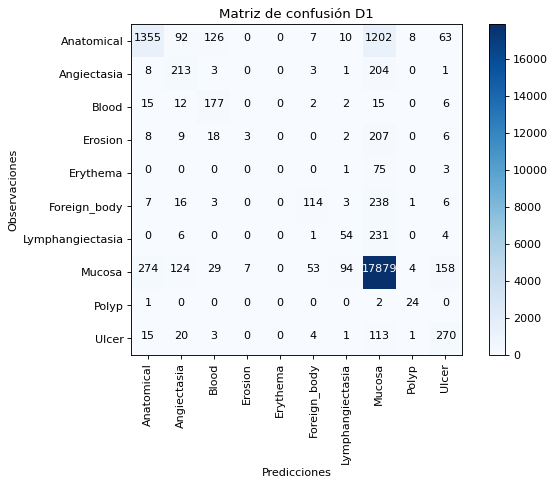

In [ ]:
## Graficar matriz de confusión

cm_plot_labels = ["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"]
plot_confusion_matrix(cm=cm_D1_0_1,classes=cm_plot_labels,title="Matriz de confusión D1")

Matriz de confusión sin normalizar
[[    3     0     0     0     0     0     0  2860     0     0]
 [    0     0     0     0     0     0     0   433     0     0]
 [    0     0     0     0     0     0     0   229     0     0]
 [    0     0     0     0     0     0     0   253     0     0]
 [    0     0     0     0     0     0     0    79     0     0]
 [    1     0     0     0     0     0     0   387     0     0]
 [    0     0     0     0     0     0     0   296     0     0]
 [    0     0     0     0     0     0     0 18622     0     0]
 [    0     0     0     0     0     0     0    27     0     0]
 [    0     0     0     0     0     0     0   427     0     0]]


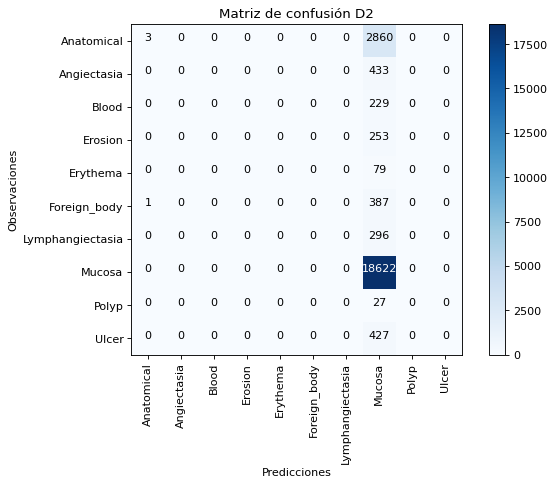

In [ ]:
plot_confusion_matrix(cm=cm_D2_0_1,classes=cm_plot_labels,title="Matriz de confusión D2")

Matriz de confusión sin normalizar
[[ 1888     1    13    30     3    17     5   879     1    26]
 [   30   210     3     0     0     3     0   183     1     3]
 [   14     3   195     0     0     1     0    13     0     3]
 [   38     2     1    68     0     2     0   139     0     3]
 [    2     0     0     0    35     0     0    39     0     3]
 [   11     0     1     2     0   265     3   106     0     0]
 [   25     2     0     2     0    18    96   149     0     4]
 [  503    25    10    79     7    86    25 17830     0    57]
 [    1     0     0     0     0     0     0     1    25     0]
 [   42     0     1     3     0     0     0    94     0   287]]


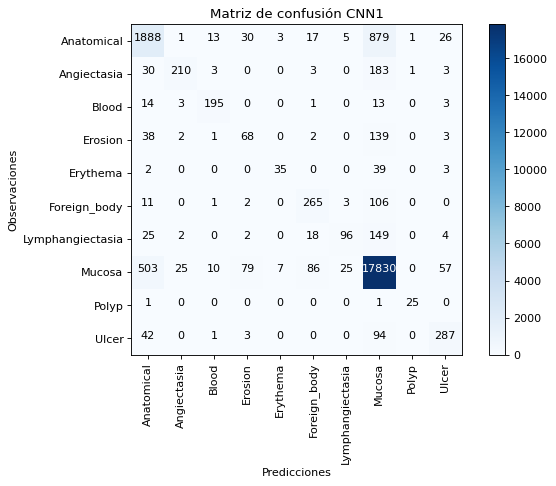

In [ ]:
plot_confusion_matrix(cm=cm_CNN1_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN1")

Matriz de confusión sin normalizar
[[ 2175     2    12     4     1     2     4   639     0    24]
 [   23   241    10     0     0     0     1   153     0     5]
 [   18     0   186     0     0     0     1    20     0     4]
 [   54     0     1    45     0     0     3   145     0     5]
 [    2     0     0     0    37     0     0    39     0     1]
 [   34     0     1     2     0   196    16   139     0     0]
 [    6     1     0     0     0     0   192    97     0     0]
 [  745    21     1    29     2     5    41 17733     0    45]
 [    0     0     0     0     0     0     0     0    27     0]
 [   26     0     3     0     0     0     2    79     0   317]]


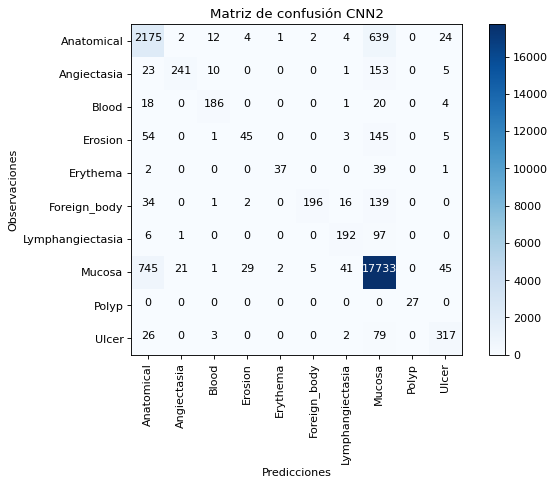

In [ ]:
plot_confusion_matrix(cm=cm_CNN2_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN2")

Matriz de confusión sin normalizar
[[ 2095     6     3    24     2    14     3   705     2     9]
 [    2   393     1     4     0     3     0    29     0     1]
 [   10     4   187     0     0     0     1    25     0     2]
 [   19     2     0   135     0     2     1    91     0     3]
 [    0     2     0     0    43     0     0    34     0     0]
 [    2     4     0     3     0   301     4    74     0     0]
 [    1     4     0     6     0     4   231    50     0     0]
 [   50    99     0    43     4    37    12 18367     0    10]
 [    1     0     0     0     0     0     0     4    22     0]
 [    7     1     0     0     0     2     1    48     0   368]]


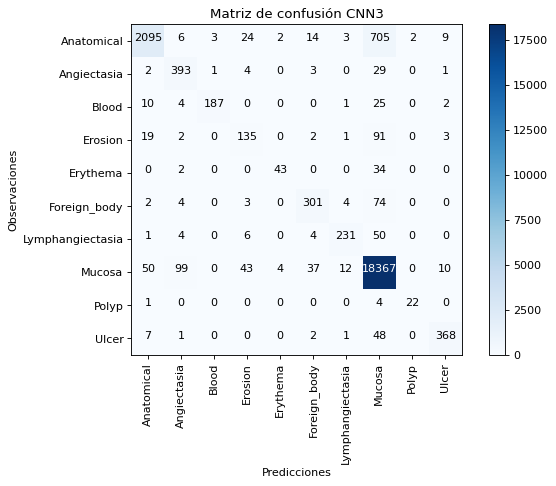

In [ ]:
plot_confusion_matrix(cm=cm_CNN3_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN3")

Matriz de confusión sin normalizar
[[ 2340    22     2    11     0    10     6   380     0    92]
 [    1   408     0     0     0     0     0    23     0     1]
 [    8     9   187     0     0     2     0     8     0    15]
 [    4     7     0   173     0     0     1    58     0    10]
 [    0     4     0     1    41     1     0    30     0     2]
 [    4     2     0     0     0   326     4    49     0     3]
 [    2     0     0     0     0     4   257    32     0     1]
 [  127   133     0    28     0    48    50 18144     0    92]
 [    0     0     0     0     0     0     0     1    26     0]
 [    0     0     0     2     0     0     0    12     0   413]]


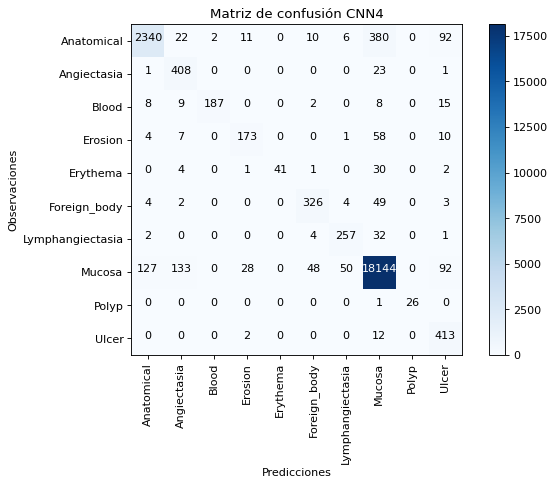

In [ ]:
plot_confusion_matrix(cm=cm_CNN4_0_1,classes=cm_plot_labels,title="Matriz de confusión CNN4")

### **TRAIN = SPLIT_1 // VALIDATION/TEST = SPLIT_0**

In [ ]:
train_path_1 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/10C/Split_1"
valid_path_0 = "/content/drive/MyDrive/Capstone_Project/Datos/labelled_images/2-fold/10C/Split_0"

train_size_1 = 23617 # Medida del train dataset
valid_size_0 = 23621 # Medida del validation dataset

In [ ]:
train_generator_1 = train_datagen.flow_from_directory(train_path_1, target_size=(img_h,img_w), classes=["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"], batch_size=bs) # Generador de imágenes para train, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El orden del output es aleatorio
valid_generator_0 = valid_datagen.flow_from_directory(directory=valid_path_0, target_size=(img_h,img_w), classes=["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"], batch_size=bs) # Generador de imágenes para validation, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El output tiene las imágenes en orden
test_generator_0 = valid_datagen.flow_from_directory(directory=valid_path_0, target_size=(img_h,img_w), classes=["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"], batch_size=bs, shuffle=False) # Generador de imágenes para test, selecciona fotos del directorio especificado en función del nombre de la carpeta (class) y define el tamaño de lote a introducir en el modelo. El output tiene las imágenes en orden

Found 23617 images belonging to 10 classes.
Found 23621 images belonging to 10 classes.
Found 23621 images belonging to 10 classes.


In [ ]:

# Lo mismo que en el caso de Train = Split_0 y Validation = Split_1, pero a la inversa

print("MODELO 10C D1")
HistD1_1_0 = mD1.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    )

print("MODELO 10C D2")
HistD2_1_0 = mD2.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    )

print("MODELO 10C CNN1")
HistCNN1_1_0 = mCNN1.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    )

print("MODELO 10C CNN2")
HistCNN2_1_0 = mCNN2.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    )

print("MODELO 10C CNN3")
HistCNN3_1_0 = mCNN3.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    )

print("MODELO 10C CNN4")
HistCNN4_1_0 = mCNN4.fit(
    train_generator_1, 
    validation_data = valid_generator_0,
    epochs = 10,
    )

MODELO 10C D1
Epoch 1/10
185/185 [==============================] - 151s 817ms/step - loss: 0.6147 - accuracy: 0.8509 - val_loss: 0.4987 - val_accuracy: 0.8705
Epoch 2/10
185/185 [==============================] - 134s 729ms/step - loss: 0.5390 - accuracy: 0.8621 - val_loss: 0.4735 - val_accuracy: 0.8778
Epoch 3/10
185/185 [==============================] - 136s 737ms/step - loss: 0.5176 - accuracy: 0.8673 - val_loss: 0.4422 - val_accuracy: 0.8854
Epoch 4/10
185/185 [==============================] - 135s 732ms/step - loss: 0.5015 - accuracy: 0.8677 - val_loss: 0.5186 - val_accuracy: 0.8561
Epoch 5/10
185/185 [==============================] - 135s 731ms/step - loss: 0.4857 - accuracy: 0.8735 - val_loss: 0.4836 - val_accuracy: 0.8663
Epoch 6/10
185/185 [==============================] - 135s 731ms/step - loss: 0.4756 - accuracy: 0.8750 - val_loss: 0.4590 - val_accuracy: 0.8791
Epoch 7/10
185/185 [==============================] - 135s 734ms/step - loss: 0.4760 - accuracy: 0.8748 - val_

In [ ]:
val_acc_D1_1_0 = list(HistD1_1_0.history["val_accuracy"])
max_val_acc_D1_1_0 = max(val_acc_D1_1_0)

val_acc_D2_1_0 = list(HistD2_1_0.history["val_accuracy"])
max_val_acc_D2_1_0 = max(val_acc_D1_1_0)

val_acc_CNN1_1_0 = list(HistCNN1_1_0.history["val_accuracy"])
max_val_acc_CNN1_1_0 = max(val_acc_CNN1_1_0)

val_acc_CNN2_1_0 = list(HistCNN2_1_0.history["val_accuracy"])
max_val_acc_CNN2_1_0 = max(val_acc_CNN2_1_0)

val_acc_CNN3_1_0 = list(HistCNN3_1_0.history["val_accuracy"])
max_val_acc_CNN3_1_0 = max(val_acc_CNN3_1_0)

val_acc_CNN4_1_0 = list(HistCNN4_1_0.history["val_accuracy"])
max_val_acc_CNN4_1_0 = max(val_acc_CNN4_1_0)

max_acc_1_0 = [max_val_acc_D1_1_0, max_val_acc_D2_1_0, max_val_acc_CNN1_1_0, max_val_acc_CNN2_1_0, max_val_acc_CNN3_1_0, max_val_acc_CNN4_1_0]

**PREDICCIÓN MODELO 1-0**

In [ ]:
# Lo mismo que en el caso de Train = Split_0 y Validation = Split_1, pero a la inversa

print("MODELO 10C D1")
Pred_mD1_1_0 = mD1.predict(test_generator_0, verbose=1)

print("MODELO 10C D2")
Pred_mD2_1_0 = mD2.predict(test_generator_0, verbose=1)

print("MODELO 10C CNN1")
Pred_mCNN1_1_0 = mCNN1.predict(test_generator_0, verbose=1)

print("MODELO 10C CNN2")
Pred_mCNN2_1_0 = mCNN2.predict(test_generator_0, verbose=1)

print("MODELO 10C CNN3")
Pred_mCNN3_1_0 = mCNN3.predict(test_generator_0, verbose=1)

print("MODELO 10C CNN4")
Pred_mCNN4_1_0 = mCNN4.predict(test_generator_0, verbose=1)

MODELO 10C D1
185/185 [==============================] - 68s 367ms/step
MODELO 10C D2
185/185 [==============================] - 68s 369ms/step
MODELO 10C CNN1
185/185 [==============================] - 68s 366ms/step
MODELO 10C CNN2
185/185 [==============================] - 67s 364ms/step
MODELO 10C CNN3
185/185 [==============================] - 68s 368ms/step
MODELO 10C CNN4
185/185 [==============================] - 68s 366ms/step


**MATRICES DE CONFUSIÓN**

In [ ]:
# Cálculo de las matrices de confusión para cada una de las estructuras que se han modelado:

# Matriz de confusión para el modelo D1:
cm_D1_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mD1_1_0, axis=-1)) 

# Matriz de confusión para el modelo D2:
cm_D2_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mD2_1_0, axis=-1))

# Matriz de confusión para el modelo CNN1:
cm_CNN1_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mCNN1_1_0, axis=-1))

# Matriz de confusión para el modelo CNN2:
cm_CNN2_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mCNN2_1_0, axis=-1))

# Matriz de confusión para el modelo CNN3:
cm_CNN3_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mCNN3_1_0, axis=-1))

# Matriz de confusión para el modelo CNN4:
cm_CNN4_1_0 = confusion_matrix(y_true=test_generator_0.classes, y_pred=np.argmax(Pred_mCNN4_1_0, axis=-1))

In [ ]:
test_generator_1.class_indices

Matriz de confusión sin normalizar
[[ 2217     0     1    10     4    12     1   613     2     5]
 [   36    49     0     0     5    12     1   329     0     1]
 [   78     0   132     2     0     0     0    17     0     0]
 [   99     0     1     4     0     4     1   143     0     1]
 [   15     0     0     0    24     0     1    40     0     0]
 [   45     0     0     8     1   186     2   145     1     0]
 [   23     0     0     0     3     7    54   209     0     0]
 [ 1779     0     0     6    18    63    77 16658    13     8]
 [    1     0     0     0     0     0     0     0    27     0]
 [   92     0     1     8     0     1     0   149     1   175]]


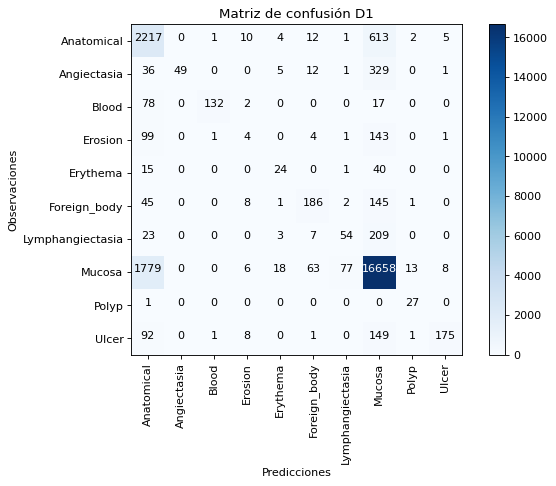

In [ ]:
## Graficar matrices de confusión
cm_plot_labels = ["Anatomical", "Angiectasia", "Blood", "Erosion", "Erythema", "Foreign_body", "Lymphangiectasia", "Mucosa", "Polyp", "Ulcer"]
plot_confusion_matrix(cm=cm_D1_1_0,classes=cm_plot_labels,title="Matriz de confusión D1")

Matriz de confusión sin normalizar
[[    3     0     0     0     0     0     0  2862     0     0]
 [    0     0     0     0     0     0     0   433     0     0]
 [    0     0     0     0     0     0     0   229     0     0]
 [    0     0     0     0     0     0     0   253     0     0]
 [    0     0     0     0     0     0     0    80     0     0]
 [    0     0     0     0     0     0     0   388     0     0]
 [    0     0     0     0     0     0     0   296     0     0]
 [    0     0     0     0     0     0     0 18622     0     0]
 [    0     0     0     0     0     0     0    28     0     0]
 [    1     0     0     0     0     0     0   426     0     0]]


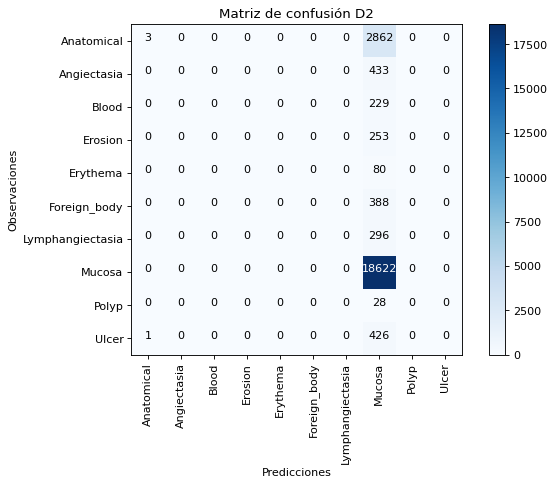

In [ ]:
plot_confusion_matrix(cm=cm_D2_1_0,classes=cm_plot_labels,title="Matriz de confusión D2")

Matriz de confusión sin normalizar
[[ 1820     6     2    10     1     8     4  1001     0    13]
 [   11   256     1     0     0     0     0   165     0     0]
 [   16     2   194     1     0     0     1    13     0     2]
 [   28     2     0    62     0     3     2   155     0     1]
 [    0     0     0     0    50     0     0    30     0     0]
 [    3     0     0     1     0   305     3    76     0     0]
 [    4     0     0     1     0     5   166   120     0     0]
 [  261     8     0    11     1    48    15 18255     0    23]
 [    0     0     0     0     0     0     0     0    28     0]
 [   15     2     0     1     0     0     0    70     0   339]]


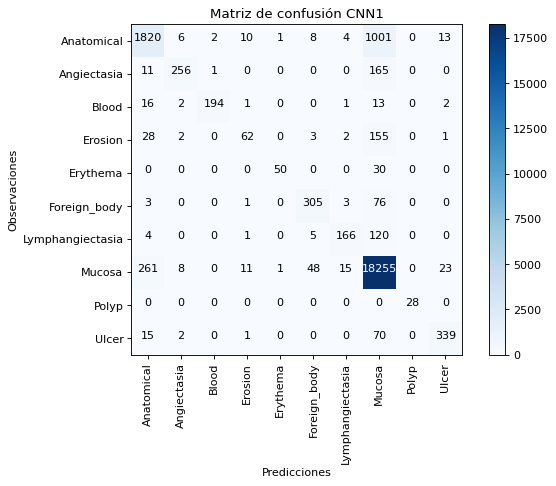

In [ ]:
plot_confusion_matrix(cm=cm_CNN1_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN1")

Matriz de confusión sin normalizar
[[ 2203     9     8    23     0     3     2   607     0    10]
 [    6   347     4     3     0     0     1    71     0     1]
 [    8     1   204     2     0     0     0    13     0     1]
 [   20     3     0   136     0     0     1    93     0     0]
 [    7     0     0     0    45     0     0    28     0     0]
 [    8     0     0     6     0   295     5    73     0     1]
 [    2     2     1     1     0     1   224    65     0     0]
 [  295    19     5    87     4    21    27 18151     0    13]
 [    0     0     0     0     0     0     0     0    28     0]
 [   15     0     0     3     0     0     0    72     0   337]]


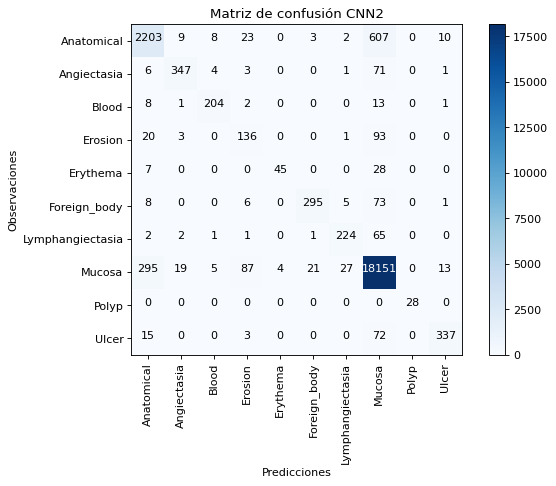

In [ ]:
plot_confusion_matrix(cm=cm_CNN2_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN2")

Matriz de confusión sin normalizar
[[ 2282     5    22    14     0     5     1   524     0    12]
 [    2   397     9     2     0     0     0    23     0     0]
 [    4     1   221     1     0     0     0     2     0     0]
 [    9     0     1   192     0     0     0    51     0     0]
 [    1     0     0     0    59     0     0    20     0     0]
 [    3     0     0     0     0   346     4    34     0     1]
 [    0     0     0     0     0     1   267    28     0     0]
 [   30    11    11    17     2     9     6 18524     1    11]
 [    0     0     0     0     0     0     0     0    28     0]
 [    3     0     2     0     0     0     2    11     0   409]]


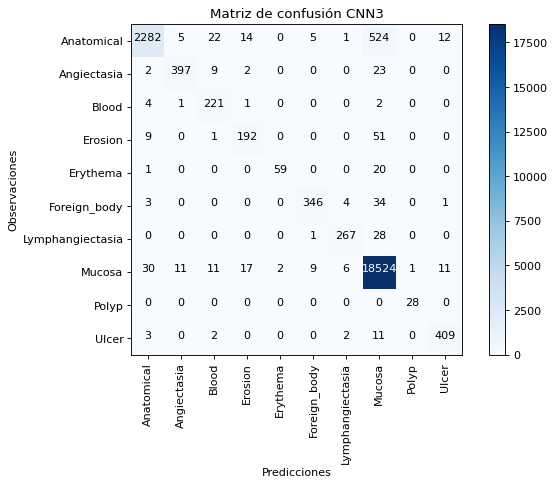

In [ ]:
plot_confusion_matrix(cm=cm_CNN3_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN3")

Matriz de confusión sin normalizar
[[ 2699     0     6     5     1    12     5   134     0     3]
 [   12   371     6     2     0     0     2    38     1     1]
 [    4     0   224     0     0     0     0     1     0     0]
 [   12     0     0   200     0     2     1    38     0     0]
 [    4     0     0     0    64     0     0    12     0     0]
 [    5     0     0     0     0   365     2    16     0     0]
 [    1     0     0     0     0     4   271    20     0     0]
 [  226     5     2     5     9    34    31 18289     0    21]
 [    0     0     0     0     0     0     0     0    28     0]
 [    8     0     0     0     0     1     0    16     0   402]]


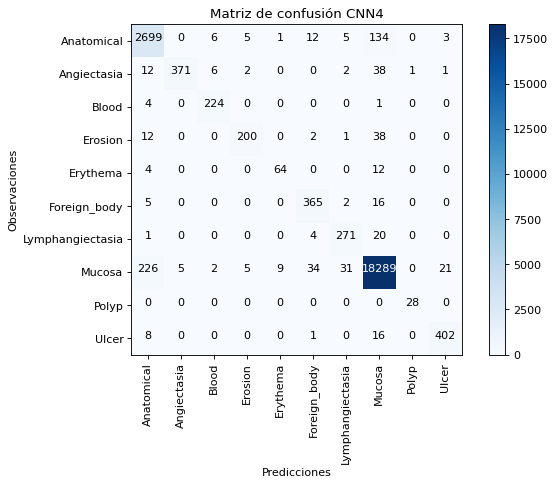

In [ ]:
plot_confusion_matrix(cm=cm_CNN4_1_0,classes=cm_plot_labels,title="Matriz de confusión CNN4")

## **MEDIA DE LOS RESULTADOS DEL 2-FOLD**

**MEDIA DE LAS MATRICES DE CONFUSIÓN**

In [ ]:
# Cálculo de las matrices de confusión para cada una de las estructuras que se han modelado:

# Matriz de confusión para el modelo D1:
cm_D1_m = ((cm_D1_0_1 + cm_D1_1_0) / 2).astype(int)

# Matriz de confusión para el modelo D2:
cm_D2_m = ((cm_D2_0_1 + cm_D2_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN1:
cm_CNN1_m = ((cm_CNN1_0_1 + cm_CNN1_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN2:
cm_CNN2_m = ((cm_CNN2_0_1 + cm_CNN2_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN3:
cm_CNN3_m = ((cm_CNN3_0_1 + cm_CNN3_1_0) / 2).astype(int)

# Matriz de confusión para el modelo CNN4:
cm_CNN4_m = ((cm_CNN3_0_1 + cm_CNN3_1_0) / 2).astype(int)

Matriz de confusión sin normalizar
[[ 1786    46    63     5     2     9     5   907     5    34]
 [   22   131     1     0     2     7     1   266     0     1]
 [   46     6   154     1     0     1     1    16     0     3]
 [   53     4     9     3     0     2     1   175     0     3]
 [    7     0     0     0    12     0     1    57     0     1]
 [   26     8     1     4     0   150     2   191     1     3]
 [   11     3     0     0     1     4    54   220     0     2]
 [ 1026    62    14     6     9    58    85 17268     8    83]
 [    1     0     0     0     0     0     0     1    25     0]
 [   53    10     2     4     0     2     0   131     1   222]]


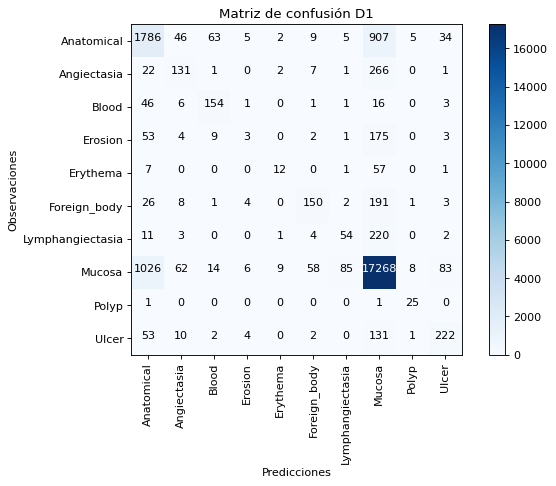

In [ ]:
plot_confusion_matrix(cm=cm_D1_m,classes=cm_plot_labels,title="Matriz de confusión D1")

Matriz de confusión sin normalizar
[[    3     0     0     0     0     0     0  2861     0     0]
 [    0     0     0     0     0     0     0   433     0     0]
 [    0     0     0     0     0     0     0   229     0     0]
 [    0     0     0     0     0     0     0   253     0     0]
 [    0     0     0     0     0     0     0    79     0     0]
 [    0     0     0     0     0     0     0   387     0     0]
 [    0     0     0     0     0     0     0   296     0     0]
 [    0     0     0     0     0     0     0 18622     0     0]
 [    0     0     0     0     0     0     0    27     0     0]
 [    0     0     0     0     0     0     0   426     0     0]]


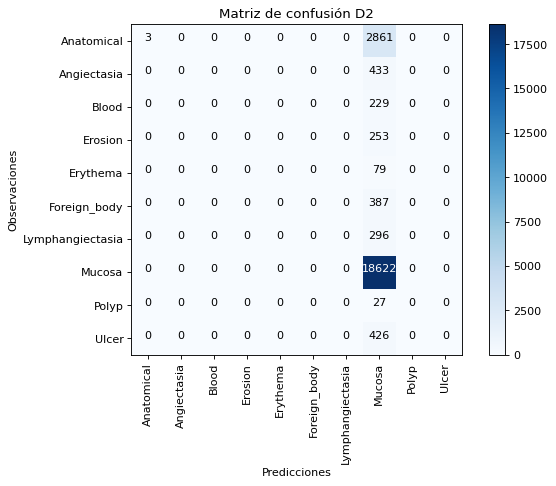

In [ ]:
plot_confusion_matrix(cm=cm_D2_m,classes=cm_plot_labels,title="Matriz de confusión D2")

Matriz de confusión sin normalizar
[[ 1854     3     7    20     2    12     4   940     0    19]
 [   20   233     2     0     0     1     0   174     0     1]
 [   15     2   194     0     0     0     0    13     0     2]
 [   33     2     0    65     0     2     1   147     0     2]
 [    1     0     0     0    42     0     0    34     0     1]
 [    7     0     0     1     0   285     3    91     0     0]
 [   14     1     0     1     0    11   131   134     0     2]
 [  382    16     5    45     4    67    20 18042     0    40]
 [    0     0     0     0     0     0     0     0    26     0]
 [   28     1     0     2     0     0     0    82     0   313]]


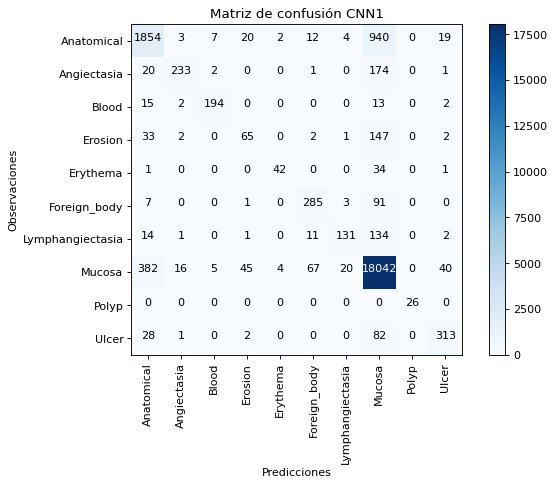

In [ ]:
plot_confusion_matrix(cm=cm_CNN1_m,classes=cm_plot_labels,title="Matriz de confusión CNN1")

Matriz de confusión sin normalizar
[[ 2189     5    10    13     0     2     3   623     0    17]
 [   14   294     7     1     0     0     1   112     0     3]
 [   13     0   195     1     0     0     0    16     0     2]
 [   37     1     0    90     0     0     2   119     0     2]
 [    4     0     0     0    41     0     0    33     0     0]
 [   21     0     0     4     0   245    10   106     0     0]
 [    4     1     0     0     0     0   208    81     0     0]
 [  520    20     3    58     3    13    34 17942     0    29]
 [    0     0     0     0     0     0     0     0    27     0]
 [   20     0     1     1     0     0     1    75     0   327]]


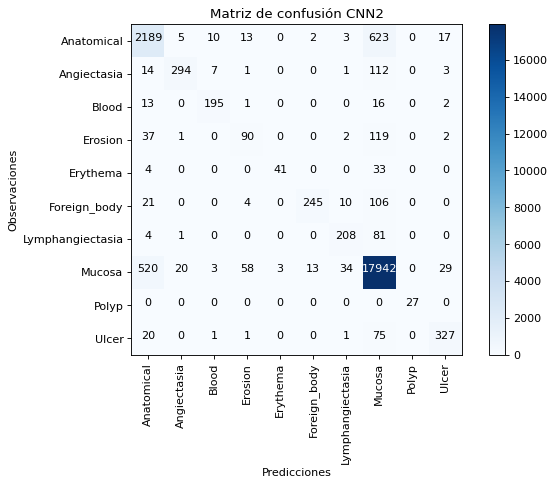

In [ ]:
plot_confusion_matrix(cm=cm_CNN2_m,classes=cm_plot_labels,title="Matriz de confusión CNN2")

Matriz de confusión sin normalizar
[[ 2188     5    12    19     1     9     2   614     1    10]
 [    2   395     5     3     0     1     0    26     0     0]
 [    7     2   204     0     0     0     0    13     0     1]
 [   14     1     0   163     0     1     0    71     0     1]
 [    0     1     0     0    51     0     0    27     0     0]
 [    2     2     0     1     0   323     4    54     0     0]
 [    0     2     0     3     0     2   249    39     0     0]
 [   40    55     5    30     3    23     9 18445     0    10]
 [    0     0     0     0     0     0     0     2    25     0]
 [    5     0     1     0     0     1     1    29     0   388]]


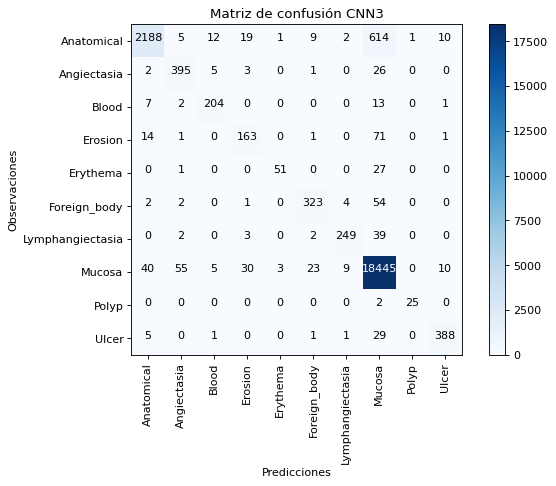

In [ ]:
plot_confusion_matrix(cm=cm_CNN3_m,classes=cm_plot_labels,title="Matriz de confusión CNN3")

Matriz de confusión sin normalizar
[[ 2188     5    12    19     1     9     2   614     1    10]
 [    2   395     5     3     0     1     0    26     0     0]
 [    7     2   204     0     0     0     0    13     0     1]
 [   14     1     0   163     0     1     0    71     0     1]
 [    0     1     0     0    51     0     0    27     0     0]
 [    2     2     0     1     0   323     4    54     0     0]
 [    0     2     0     3     0     2   249    39     0     0]
 [   40    55     5    30     3    23     9 18445     0    10]
 [    0     0     0     0     0     0     0     2    25     0]
 [    5     0     1     0     0     1     1    29     0   388]]


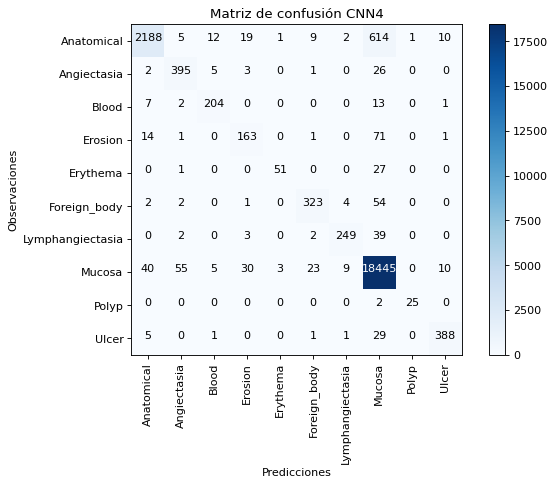

In [ ]:
plot_confusion_matrix(cm=cm_CNN4_m,classes=cm_plot_labels,title="Matriz de confusión CNN4")

**GUARDAR LOS MODELOS**

In [ ]:
## GUARDAR EL MODELO COMPLETO: PARAMETROS, PESOS, TODO

mD1.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/D1/10C_model_D1.h5")
mD2.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/D2/10C_model_D2.h5")
mCNN1.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/CNN1/10C_model_CNN1.h5")
mCNN2.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/CNN2/10C_model_CNN2.h5")
mCNN3.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/CNN3/10C_model_CNN3.h5")
mCNN4.save("/content/drive/MyDrive/Capstone_Project/Resultados_Modelos/10C/Modelos/CNN4/10C_model_CNN4.h5")